In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns





#Tells pandas to show all columns when displaying the DataFrame
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
df = pd.read_csv('colleges.csv', index_col=[0])
df.shape

(3798, 508)

In [3]:
df.head(5)

,unitid,chronname,city,state,level,control,basic,hbcu,flagship,long_x,lat_y,site,student_count,awards_per_value,awards_per_state_value,awards_per_natl_value,exp_award_value,exp_award_state_value,exp_award_natl_value,exp_award_percentile,ft_pct,fte_value,fte_percentile,med_sat_value,med_sat_percentile,aid_value,aid_percentile,endow_value,endow_percentile,grad_100_value,grad_100_percentile,grad_150_value,grad_150_percentile,pell_value,pell_percentile,retain_value,retain_percentile,ft_fac_value,ft_fac_percentile,vsa_year,vsa_grad_after4_first,vsa_grad_elsewhere_after4_first,vsa_enroll_after4_first,vsa_enroll_elsewhere_after4_first,vsa_grad_after6_first,vsa_grad_elsewhere_after6_first,vsa_enroll_after6_first,vsa_enroll_elsewhere_after6_first,vsa_grad_after4_transfer,vsa_grad_elsewhere_after4_transfer,vsa_enroll_after4_transfer,vsa_enroll_elsewhere_after4_transfer,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size,UNITID,OPEID,opeid6,INSTNM,CITY,STABBR,ZIP,AccredAgency,INSTURL,NPCURL,HCM2,main,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,st_fips,region,LOCALE,LATITUDE,LONGITUDE,HBCU,PBI,ANNHI,TRIBAL,AANAPII,HSI,NANTI,MENONLY,WOMENONLY,PCIP01,PCIP03,PCIP04,PCIP05,PCIP09,PCIP10,PCIP11,PCIP12,PCIP13,PCIP14,PCIP15,PCIP16,PCIP19,PCIP22,PCIP23,PCIP24,PCIP25,PCIP26,PCIP27,PCIP29,PCIP30,PCIP31,PCIP38,PCIP39,PCIP40,PCIP41,PCIP42,PCIP43,PCIP44,PCIP45,PCIP46,PCIP47,PCIP48,PCIP49,PCIP50,PCIP51,PCIP52,PCIP54,CIP01CERT1,CIP01CERT2,CIP01ASSOC,CIP01CERT4,CIP01BACHL,CIP03CERT1,CIP03CERT2,CIP03ASSOC,CIP03CERT4,CIP03BACHL,CIP04CERT1,CIP04CERT2,CIP04ASSOC,CIP04CERT4,CIP04BACHL,CIP05CERT1,CIP05CERT2,CIP05ASSOC,CIP05CERT4,CIP05BACHL,CIP09CERT1,CIP09CERT2,CIP09ASSOC,CIP09CERT4,CIP09BACHL,CIP10CERT1,CIP10CERT2,CIP10ASSOC,CIP10CERT4,CIP10BACHL,CIP11CERT1,CIP11CERT2,CIP11ASSOC,CIP11CERT4,CIP11BACHL,CIP12CERT1,CIP12CERT2,CIP12ASSOC,CIP12CERT4,CIP12BACHL,CIP13CERT1,CIP13CERT2,CIP13ASSOC,CIP13CERT4,CIP13BACHL,CIP14CERT1,CIP14CERT2,CIP14ASSOC,CIP14CERT4,CIP14BACHL,CIP15CERT1,CIP15CERT2,CIP15ASSOC,CIP15CERT4,CIP15BACHL,CIP16CERT1,CIP16CERT2,CIP16ASSOC,CIP16CERT4,CIP16BACHL,CIP19CERT1,CIP19CERT2,CIP19ASSOC,CIP19CERT4,CIP19BACHL,CIP22CERT1,CIP22CERT2,CIP22ASSOC,CIP22CERT4,CIP22BACHL,CIP23CERT1,CIP23CERT2,CIP23ASSOC,CIP23CERT4,CIP23BACHL,CIP24CERT1,CIP24CERT2,CIP24ASSOC,CIP24CERT4,CIP24BACHL,CIP25CERT1,CIP25CERT2,CIP25ASSOC,CIP25CERT4,CIP25BACHL,CIP26CERT1,CIP26CERT2,CIP26ASSOC,CIP26CERT4,CIP26BACHL,CIP27CERT1,CIP27CERT2,CIP27ASSOC,CIP27CERT4,CIP27BACHL,CIP29CERT1,CIP29CERT2,CIP29ASSOC,CIP29CERT4,CIP29BACHL,CIP30CERT1,CIP30CERT2,CIP30ASSOC,CIP30CERT4,CIP30BACHL,CIP31CERT1,CIP31CERT2,CIP31ASSOC,CIP31CERT4,CIP31BACHL,CIP38CERT1,CIP38CERT2,CIP38ASSOC,CIP38CERT4,CIP38BACHL,CIP39CERT1,CIP39CERT2,CIP39ASSOC,CIP39CERT4,CIP39BACHL,CIP40CERT1,CIP40CERT2,CIP40ASSOC,CIP40CERT4,CIP40BACHL,CIP41CERT1,CIP41CERT2,CIP41ASSOC,CIP41CERT4,CIP41BACHL,CIP42CERT1,CIP42CERT2,CIP42ASSOC,CIP42CERT4,CIP42BACHL,CIP43CERT1,CIP43CERT2,CIP43ASSOC,CIP43CERT4,CIP43BACHL,CIP44CERT1,CIP44CERT2,CIP44ASSOC,CIP44CERT4,CIP44BACHL,CIP45CERT1,CIP45CERT2,CIP45ASSOC,CIP45CERT4,CIP45BACHL,CIP46CERT1,CIP46CERT2,CIP46ASSOC,CIP46CERT4,CIP46BACHL,CIP47CERT1,CIP47CERT2,CIP47ASSOC,CIP47CERT4,CIP47BACHL,CIP48CERT1,CIP48CERT2,CIP48ASSOC,CIP48CERT4,CIP48BACHL,CIP49CERT1,CIP49CERT2,CIP49ASSOC,CIP49CERT4,CIP49BACHL,CIP50CERT1,CIP50CERT2,CIP50ASSOC,CIP50CERT4,CIP50BACHL,CIP51CERT1,CIP51CERT2,CIP51ASSOC,CIP51CERT4,CIP51BACHL,CIP52CERT1,CIP52CERT2,CIP52ASSOC,CIP52CERT4,CIP52BACHL,CIP54CERT1,CIP54CERT2,CIP54ASSOC,CIP54CERT4,CIP54BACHL,DISTANCEONLY,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,TUITFTE,INEXPFTE,PCTPELL,poolyrs,poolyrs200,PCTFLOAN,UG25abv,CDR3,RPY_3YR_RT,COMPL_RPY_3YR_RT,NONCOM_RPY_3YR_RT,LO_INC_RPY_3YR_RT,MD_INC_RPY_3YR_RT,HI_INC_RPY_3YR_RT,DEP_RPY_3YR_RT,IND_RPY_3YR_RT,PELL_RPY_3YR_RT,NOPELL_RPY_3YR_RT,FEMALE

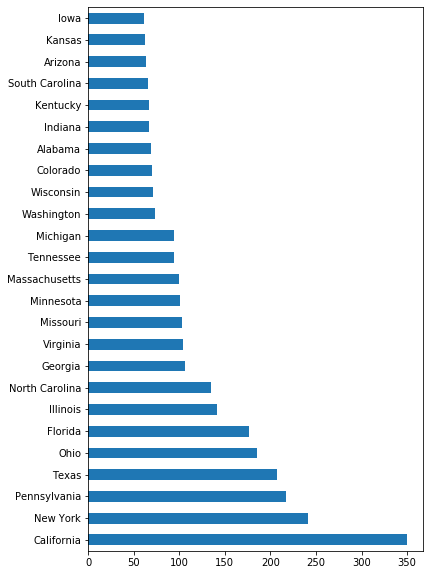

In [4]:
df['state'].value_counts().head(25).plot(kind='barh', figsize=(6,10))
plt.savefig('lots_of_colleges')

In [5]:
# excluding all other columns except the following 
col_list = ['unitid', 'chronname', 'city', 'state', 'level', 'control',
       'student_count', 'med_sat_value', 'aid_value', 'cohort_size', 'CONTROL',
       'region', 'LOCALE', 'UGDS', 'UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_AIAN',
       'UGDS_ASIAN', 'UGDS_NHPI', 'UGDS_2MOR', 'UGDS_NRA', 'UGDS_UNKN']

In [6]:
df = df[col_list]

In [7]:
df.isnull().sum().head(30)

unitid              0
chronname           0
city                0
state               0
level               0
control             0
student_count       0
med_sat_value    2461
aid_value           1
cohort_size       331
CONTROL             0
region              0
LOCALE              0
UGDS                0
UGDS_WHITE          0
UGDS_BLACK          0
UGDS_HISP           0
UGDS_AIAN           0
UGDS_ASIAN          0
UGDS_NHPI           0
UGDS_2MOR           0
UGDS_NRA            0
UGDS_UNKN           0
dtype: int64

## Changing column type

- This column is significant because the value of `11` and `12` refer to the size of the city. 
    - `11` == City: Large (population of 250,000 or more)
    - `12` == City: Midsize (population of at least 100,000 but less than 250,000)
    
- Per project outline a sstrong desire was to be in a `Urban` setting and this provides a quick way of removing some observations

In [8]:
# taking current dataframe and excluding all other rows where the column LOCALE does not == 11 or 12
df = df[(df['LOCALE'] == 11.0) | (df['LOCALE'] == 12.0)]

In [9]:
df.shape

(1301, 23)

## The column `region` is divided among the following:
- 0	U.S. Service Schools

- 1	New England (CT, ME, MA, NH, RI, VT)

- 2	Mid East (DE, DC, MD, NJ, NY, PA)

- 3	Great Lakes (IL, IN, MI, OH, WI)

- 4	Plains (IA, KS, MN, MO, NE, ND, SD)

- 5	Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)

- 6	Southwest (AZ, NM, OK, TX)

- 7	Rocky Mountains (CO, ID, MT, UT, WY)

- 8	Far West (AK, CA, HI, NV, OR, WA)

- 9	Outlying Areas (AS, FM, GU, MH, MP, PR, PW, VI)

In [10]:
regions = [1, 2, 5, 6, 8]

In [11]:
# based on profile from the project I selected on the regions that fit
df = df.loc[df.region.isin(regions), :]
df.head()

,unitid,chronname,city,state,level,control,student_count,med_sat_value,aid_value,cohort_size,CONTROL,region,LOCALE,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_AIAN,UGDS_ASIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,4051,823.0,7142.0,882.0,1,5,12.0,4051.0,0.0279,0.9501,0.0089,0.0012,0.0022,0.0010,0.0000,0.0002,0.0084
1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,11502,1146.0,6088.0,1376.0,1,5,12.0,11200.0,0.5987,0.2590,0.0258,0.0026,0.0518,0.0007,0.0344,0.0140,0.0130
2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,322,NaN,2540.0,3.0,2,5,12.0,322.0,0.2919,0.4224,0.0093,0.0031,0.0031,0.0031,0.0000,0.0000,0.2671
3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,5696,1180.0,6647.0,759.0,1,5,12.0,5525.0,0.7012,0.1310,0.0338,0.0145,0.0364,0.0002,0.0161,0.0329,0.0338
4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,5356,830.0,7256.0,1351.0,1,5,12.0,5354.0,0.0161,0.9285,0.0114,0.0009,0.0015,0.0007,0.0064,0.0207,0.0138


In [12]:
# created a variable of selected states 
states = ['Washington', 'California','Oregon', 'California', 'New Mexico', 'Arizona', 'Colorado', 'Maryland', 'Delaware', 'New Jersey', 'Pennsylvania', 'New York', 'Maine', 'Vermont', 'New Hampshere', 'Massachussetts', 'Rhode Island', 'Connecticut']

In [13]:
df = df.loc[df.state.isin(states), :]

In [14]:
df.head(5)

,unitid,chronname,city,state,level,control,student_count,med_sat_value,aid_value,cohort_size,CONTROL,region,LOCALE,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_AIAN,UGDS_ASIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
62,103644,Everest College,Phoenix,Arizona,4-year,Private for-profit,2761,NaN,4689.0,59.0,3,6,11.0,2761.0,0.3890,0.3158,0.1268,0.0283,0.0058,0.0076,0.0391,0.0004,0.0873
63,103893,Carrington College at Phoenix,Phoenix,Arizona,4-year,Private for-profit,676,NaN,3736.0,NaN,3,6,11.0,676.0,0.2618,0.0784,0.5429,0.0799,0.0044,0.0059,0.0118,0.0000,0.0148
64,103909,Carrington College-Mesa,Mesa,Arizona,2-year,Private for-profit,691,NaN,4077.0,414.0,3,6,11.0,691.0,0.4486,0.0463,0.3343,0.1172,0.0260,0.0072,0.0072,0.0000,0.0130
65,103927,Carrington College-Tucson,Tucson,Arizona,2-year,Private for-profit,440,NaN,3556.0,481.0,3,6,11.0,440.0,0.2614,0.0364,0.6136,0.0477,0.0023,0.0045,0.0136,0.0000,0.0205
67,104090,International Institute of the Americas at Gle...,Phoenix,Arizona,4-year,Private for-profit,828,NaN,4191.0,56.0,3,6,11.0,828.0,0.3249,0.2077,0.2512,0.0797,0.0193,0.0048,0.0145,0.0229,0.0749


In [15]:
# filtered dataframe to only see colleges that are 4-year institutions
df = df[df.level == '4-year']

In [16]:
df.state.value_counts()

California      100
New York         78
Pennsylvania     29
Arizona          25
Washington       18
Oregon           15
Maryland          8
New Mexico        7
Connecticut       7
New Jersey        6
Rhode Island      4
Name: state, dtype: int64

In [17]:
# remove Private_for_profit from dataframe
df = df[(df.control == 'Private-not-for-profit') | (df.control == 'Public')]

In [18]:
# removing all the private for profiit schools from CONTROL and the Tribal Colleges from basic
df = df[(df['CONTROL'] != 3)]

In [19]:
df = df[df['cohort_size'] < 1500]

In [20]:
df.head()

,unitid,chronname,city,state,level,control,student_count,med_sat_value,aid_value,cohort_size,CONTROL,region,LOCALE,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_AIAN,UGDS_ASIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
167,110486,California State University at Bakersfield,Bakersfield,California,4-year,Public,7350,901.0,11089.0,859.0,1,8,11.0,7226.0,0.1960,0.0656,0.4979,0.0073,0.0650,0.0017,0.0309,0.0255,0.1102
175,110574,California State University-East Bay,Hayward,California,4-year,Public,12146,910.0,9038.0,1032.0,1,8,12.0,12079.0,0.1843,0.1083,0.2546,0.0016,0.2439,0.0111,0.0572,0.0659,0.0732
191,111188,California Maritime Academy,Vallejo,California,4-year,Public,1045,1080.0,9009.0,155.0,1,8,12.0,1044.0,0.5785,0.0239,0.1561,0.0038,0.0824,0.0067,0.0852,0.0048,0.0584
471,130493,Southern Connecticut State University,New Haven,Connecticut,4-year,Public,8257,921.0,5950.0,1333.0,1,1,12.0,8257.0,0.6037,0.1547,0.1138,0.0024,0.0241,0.0004,0.0235,0.0039,0.0735
1110,161873,University of Baltimore,Baltimore,Maryland,4-year,Public,3526,NaN,4549.0,141.0,1,2,11.0,3479.0,0.3521,0.4622,0.0471,0.0046,0.0443,0.0020,0.0310,0.0216,0.0351


# Data is narrowed down enough, time to see what we can visualize

In [21]:
df.state.value_counts()

New York       11
New Jersey      3
California      3
Maryland        3
Oregon          1
Connecticut     1
Washington      1
Name: state, dtype: int64

In [22]:
df = df[df['UGDS_WHITE'] < 0.30]
df.head(3)

,unitid,chronname,city,state,level,control,student_count,med_sat_value,aid_value,cohort_size,CONTROL,region,LOCALE,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_AIAN,UGDS_ASIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
167,110486,California State University at Bakersfield,Bakersfield,California,4-year,Public,7350,901.0,11089.0,859.0,1,8,11.0,7226.0,0.1960,0.0656,0.4979,0.0073,0.0650,0.0017,0.0309,0.0255,0.1102
175,110574,California State University-East Bay,Hayward,California,4-year,Public,12146,910.0,9038.0,1032.0,1,8,12.0,12079.0,0.1843,0.1083,0.2546,0.0016,0.2439,0.0111,0.0572,0.0659,0.0732
1117,162283,Coppin State University,Baltimore,Maryland,4-year,Public,2920,880.0,6077.0,555.0,1,2,11.0,2880.0,0.0139,0.8337,0.0170,0.0003,0.0035,0.0010,0.0205,0.0736,0.0365


In [23]:
df.chronname.value_counts()

City University of New York Medgar Evers College                    1
California State University-East Bay                                1
New York City College of Technology/City University of New York     1
Herbert H. Lehman College of City University of New York            1
City University of New York John Jay College of Criminal Justice    1
City University of New York Bernard M. Baruch College               1
City University of New York York College                            1
California State University at Bakersfield                          1
Coppin State University                                             1
Morgan State University                                             1
Rutgers University at Newark                                        1
New Jersey City University                                          1
Name: chronname, dtype: int64

In [24]:
df = df[df['state'] != 'New York']
df.shape

(6, 23)

In [25]:
df

,unitid,chronname,city,state,level,control,student_count,med_sat_value,aid_value,cohort_size,CONTROL,region,LOCALE,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_AIAN,UGDS_ASIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
167,110486,California State University at Bakersfield,Bakersfield,California,4-year,Public,7350,901.0,11089.0,859.0,1,8,11.0,7226.0,0.1960,0.0656,0.4979,0.0073,0.0650,0.0017,0.0309,0.0255,0.1102
175,110574,California State University-East Bay,Hayward,California,4-year,Public,12146,910.0,9038.0,1032.0,1,8,12.0,12079.0,0.1843,0.1083,0.2546,0.0016,0.2439,0.0111,0.0572,0.0659,0.0732
1117,162283,Coppin State University,Baltimore,Maryland,4-year,Public,2920,880.0,6077.0,555.0,1,2,11.0,2880.0,0.0139,0.8337,0.0170,0.0003,0.0035,0.0010,0.0205,0.0736,0.0365
1136,163453,Morgan State University,Baltimore,Maryland,4-year,Public,6252,893.0,7073.0,1286.0,1,2,11.0,6197.0,0.0203,0.8451,0.0292,0.0032,0.0139,0.0011,0.0342,0.0424,0.0105
1610,185129,New Jersey City University,Jersey City,New Jersey,4-year,Public,6437,916.0,7258.0,649.0,1,2,11.0,6373.0,0.2504,0.2084,0.3435,0.0022,0.0854,0.0000,0.0108,0.0071,0.0923
1625,186399,Rutgers University at Newark,Newark,New Jersey,4-year,Public,7217,1059.0,9830.0,978.0,1,2,11.0,6748.0,0.2570,0.1867,0.2447,0.0012,0.2208,0.0049,0.0292,0.0313,0.0243


In [26]:
df['out_of_state_tuition'] = [19296, 6984, 13113, 18480, 22386, 31608]
df['applicants_admitted'] = [79, 76, 70, 68, 95, 72]
df['4_year_graduation_rate']=[41, 43, 15, 28, 39, 68]
df

,unitid,chronname,city,state,level,control,student_count,med_sat_value,aid_value,cohort_size,CONTROL,region,LOCALE,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_AIAN,UGDS_ASIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,out_of_state_tuition,applicants_admitted,4_year_graduation_rate
167,110486,California State University at Bakersfield,Bakersfield,California,4-year,Public,7350,901.0,11089.0,859.0,1,8,11.0,7226.0,0.1960,0.0656,0.4979,0.0073,0.0650,0.0017,0.0309,0.0255,0.1102,19296,79,41
175,110574,California State University-East Bay,Hayward,California,4-year,Public,12146,910.0,9038.0,1032.0,1,8,12.0,12079.0,0.1843,0.1083,0.2546,0.0016,0.2439,0.0111,0.0572,0.0659,0.0732,6984,76,43
1117,162283,Coppin State University,Baltimore,Maryland,4-year,Public,2920,880.0,6077.0,555.0,1,2,11.0,2880.0,0.0139,0.8337,0.0170,0.0003,0.0035,0.0010,0.0205,0.0736,0.0365,13113,70,15
1136,163453,Morgan State University,Baltimore,Maryland,4-year,Public,6252,893.0,7073.0,1286.0,1,2,11.0,6197.0,0.0203,0.8451,0.0292,0.0032,0.0139,0.0011,0.0342,0.0424,0.0105,18480,68,28
1610,185129,New Jersey City University,Jersey City,New Jersey,4-year,Public,6437,916.0,7258.0,649.0,1,2,11.0,6373.0,0.2504,0.2084,0.3435,0.0022,0.0854,0.0000,0.0108,0.0071,0.0923,22386,95,39
1625,186399,Rutgers University at Newark,Newark,New Jersey,4-year,Public,7217,1059.0,9830.0,978.0,1,2,11.0,6748.0,0.2570,0.1867,0.2447,0.0012,0.2208,0.0049,0.0292,0.0313,0.0243,31608,72,68


In [27]:

df.head()
df['total'] = df['UGDS_BLACK'] + df['UGDS_HISP'] + df['UGDS_ASIAN'] 

In [28]:
df = df.replace(['California State University at Bakersfield'], 'CSU Bakersfield')
df = df.replace(['California State University-East Bay'], 'CSU East Bay')
df = df.replace(['New Jersey City University'], 'NJ City University')
df = df.replace(['Rutgers University at Newark'], 'Rutgers')

In [29]:
df = df.reset_index(drop=True)

In [30]:
df.chronname

0            CSU Bakersfield
1               CSU East Bay
2    Coppin State University
3    Morgan State University
4         NJ City University
5                    Rutgers
Name: chronname, dtype: object

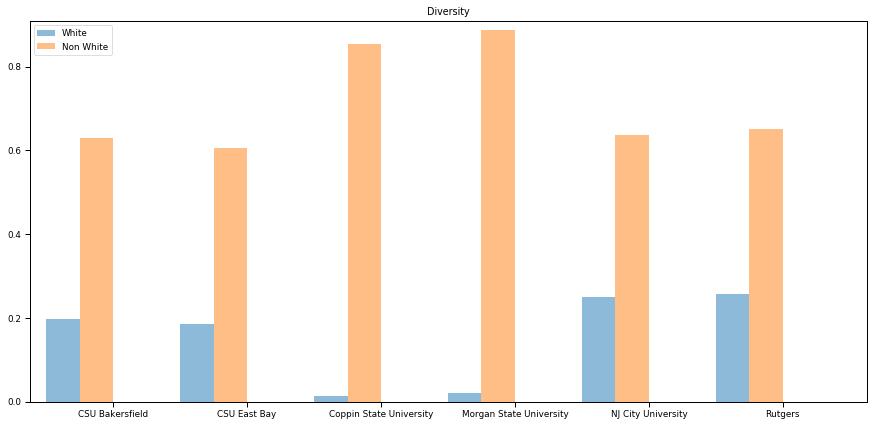

In [35]:
pos = list(range(len(df['UGDS_WHITE'])))
width= 0.25

fig, ax = plt.subplots(figsize=(15, 7))

plt.bar(pos, 
        #using df['pre_score'] data,
        df['UGDS_WHITE'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5,  
        # with label the first value in first_name
        label=df['chronname'][0])

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        df['total'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
         
        # with label the second value in first_name
        label=df['chronname'][1])

ax.set_ylabel('')
ax.set_title('Diversity')
ax.set_xticks([p + 1.5 * width for p in pos])
ax.set_xticklabels(df['chronname'])

plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(df['UGDS_WHITE'] + df['total'])] )

# Adding the legend and showing the plot
plt.legend(['White', 'Non White'], loc='upper left')
plt.savefig('diversity')
plt.show()

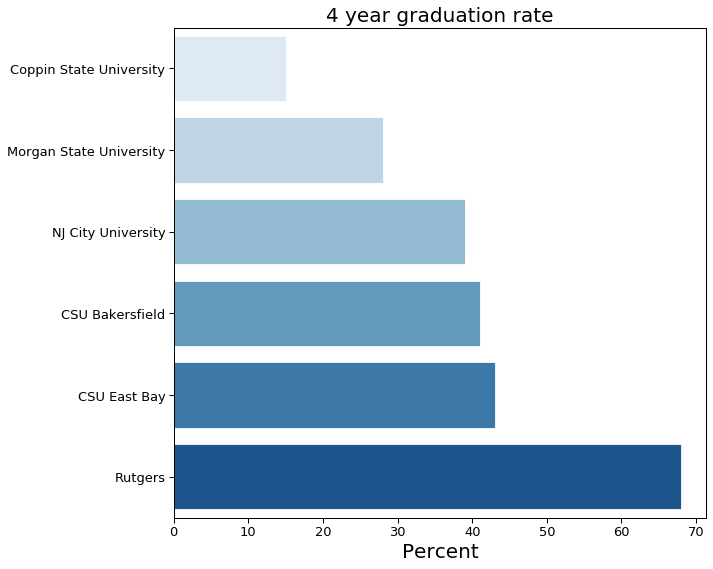

In [33]:
sns.set_context('paper')
plt.figure(figsize=(10, 8))
sns.barplot(x = '4_year_graduation_rate', y = 'chronname', data = df, palette = 'Blues', edgecolor = 'w', order = df.sort_values('4_year_graduation_rate').chronname)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Percent', fontsize=20)
plt.ylabel('')
plt.title('4 year graduation rate', fontsize=20)
plt.tight_layout()
plt.savefig('completion_rate')

plt.show()

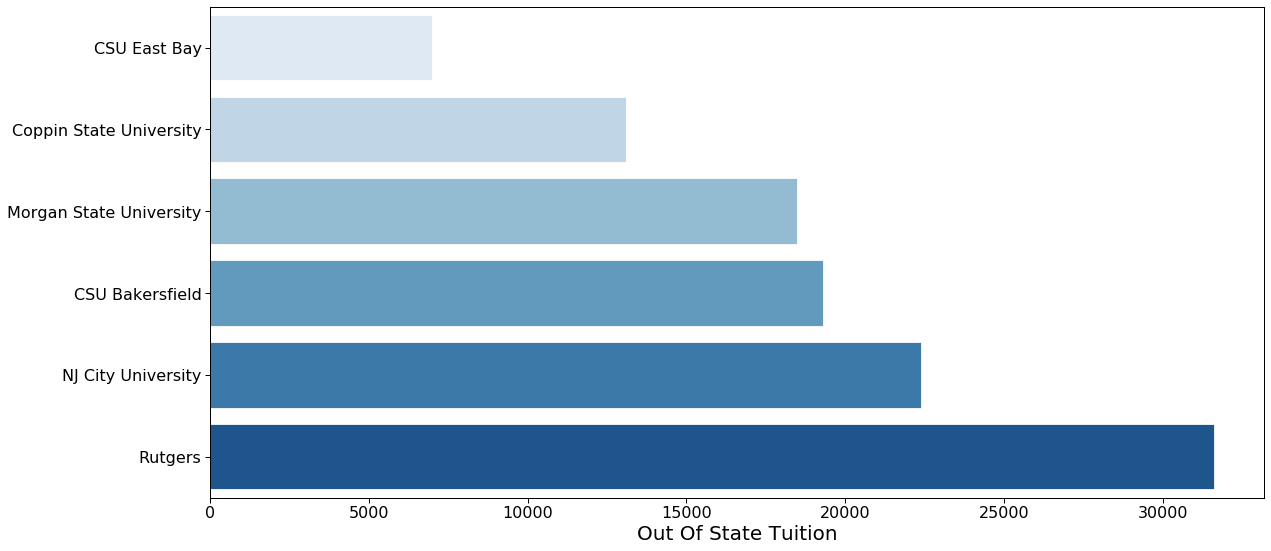

In [34]:
plt.figure(figsize=(18, 8))
plt.rcParams['font.size'] = 18
sns.barplot(data=df, y='chronname', x='out_of_state_tuition', palette = 'Blues', edgecolor = 'w', order = df.sort_values('out_of_state_tuition').chronname)
plt.ylabel("") # to get remove the column_name
plt.xlabel("Out Of State Tuition", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('')

plt.tight_layout()

plt.savefig('horizontal-chart')


In [36]:
df.to_csv('final_selected_colleges.csv')